In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
armada = pd.read_csv("/Users/jennyskytta/Downloads/armada.dat", sep=r"\s\s+", engine="python", header=None, names = ["battle", "year", "ptships", "enships",
                              "nlships", "ratio", "spinvolvement",
                              "outcome"])
armada.shape  #uses regular expressions  / regex 

(28, 8)

In [53]:
armada.sample(5)

,battle,year,ptships,enships,nlships,ratio,spinvolvement,outcome
23,Dunas,1639,38,110,0,0.345,1,-1
4,Surrat,1615,6,0,4,1.500,0,0
18,Bahia,1627,4,10,0,0.400,1,-1
14,Goa,1658,9,9,0,1.000,0,0
11,Goa,1637,6,7,0,0.857,0,0


In [32]:
N = 400  # number of dots
X1 = np.random.normal(size=N)
X2 = np.random.normal(size=N)
X = np.column_stack((X1, X2))
d = X1 - X2
y = X1 + X2 - 1.7*np.sin(1.2*d) +\
    np.random.normal(scale=0.5, size=N) > 0

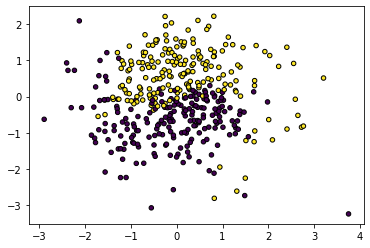

In [17]:
_ = plt.scatter(X1, X2, c=y,
                    s = 20,
                    edgecolors="black")

In [19]:
# create function that makes a decision boundary plot 

def DBPlot(m, X, y, nGrid = 100):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, nGrid),
                           np.linspace(x2_min, x2_max, nGrid))
    XX = np.column_stack((xx1.ravel(), xx2.ravel()))
    hatyy = m.predict(XX).reshape(xx1.shape)
    plt.figure(figsize=(10,10))
    _ = plt.imshow(hatyy, extent=(x1_min, x1_max, x2_min, x2_max),
                   aspect="auto",
                   interpolation='none', origin='lower',
                   alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolors='k')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

## SVM-s

In [20]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
_ = m.fit(X, y)
m.score(X, y)  # 81 % accuracy logistic regression 

0.825

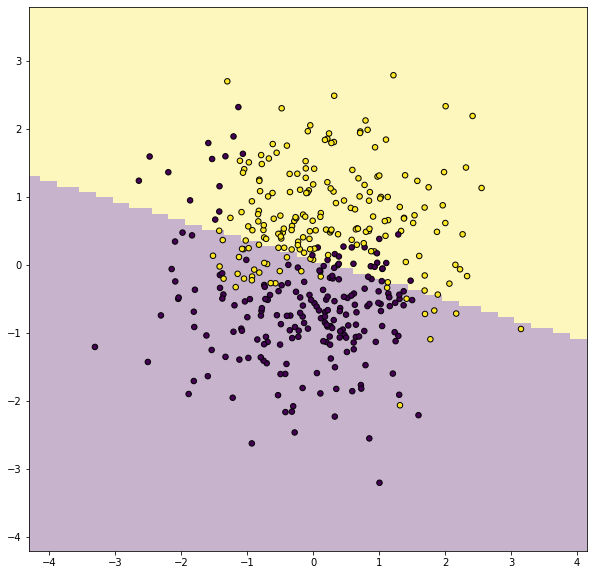

In [21]:
DBPlot(m, X, y)  # you see we get 81% right purples in yellow and yellows in purple 

0.835


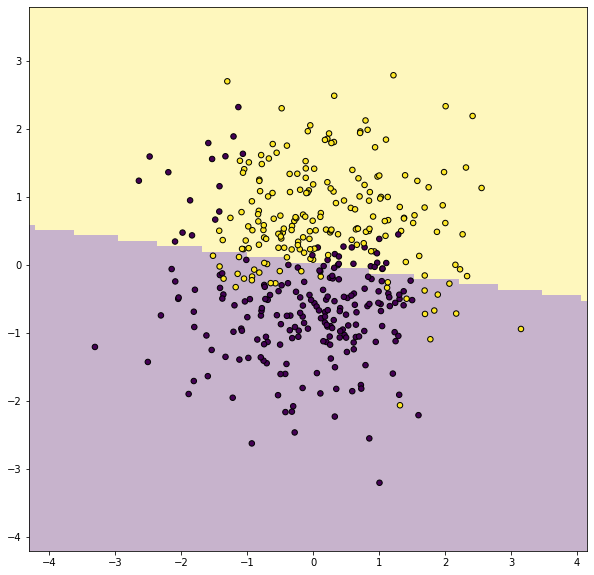

In [22]:
from sklearn.svm import SVC

m = SVC(kernel="linear")
_ = m.fit(X, y)
a = m.score(X, y)
print(a)
DBPlot(m, X, y)

0.5225


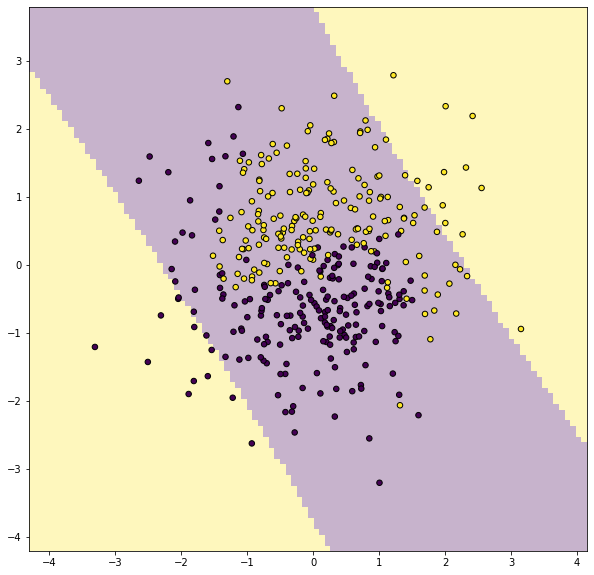

In [23]:
from sklearn.svm import SVC

m = SVC(kernel="poly", degree=2)
_ = m.fit(X, y)
a = m.score(X, y)
print(a)
DBPlot(m, X, y)

In [34]:
from sklearn.model_selection import train_test_split

Xt, Xv, yt, yv = train_test_split(X, y)
m.fit(Xt, yt)
m.score(Xv, yv)  

0.43

In [35]:
cf0s = [0, 0.5, 1, 1.5, 2]  # figuring our which coefficients are optimal 
for cf0 in cf0s:  
    m = SVC(kernel="poly", degree=2, coef0=cf0)
    _ = m.fit(Xt, yt)
    a = m.score(Xv, yv)
    print(a)

0.43
0.79
0.79
0.8
0.8


0.91


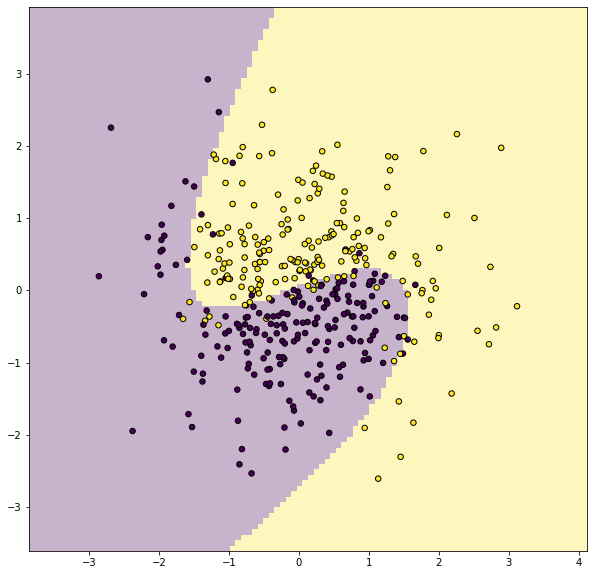

In [44]:
m = SVC(kernel="poly", degree=3, coef0=1.5)  #updated coefficient based on model run
_ = m.fit(X, y)
a = m.score(X, y)
print(a)
DBPlot(m, X, y)

## Radial kernal

0.91


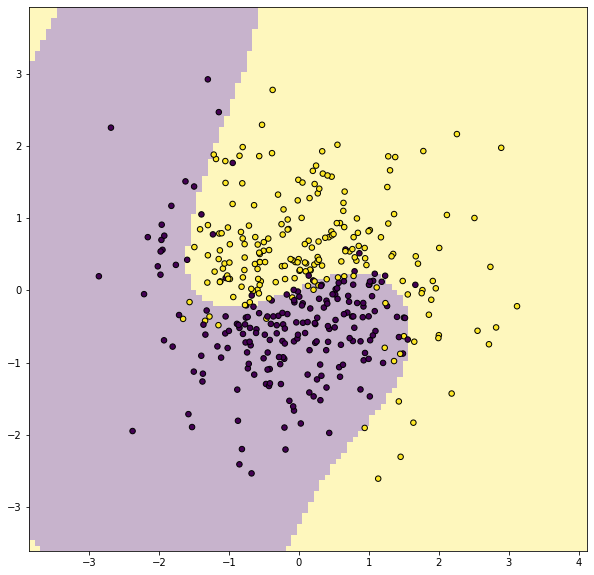

In [45]:
m = SVC(kernel="rbf", gamma=0.5, coef0=1)
_ = m.fit(X, y)
a = m.score(X, y)
print(a)
DBPlot(m, X, y)